<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_07_math_scraps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install filterpy

In [2]:
import numpy as np

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

from scipy.linalg import expm

In [95]:
def phase_portrait(A, dt, start, stop, step, count, xlim, ylim):
  
  F = expm(A*dt)
  print('A\n', A)
  print('F\n', F)
  xs = []

  for p in np.arange(start, stop, step):
    for v in np.arange(start, stop, step):
      x = np.array([[p, v]]).T
      xs.append(x)
      for _ in range(count):
        x = F.dot(x)
        xs.append(x)

  states = np.array(xs)

  plot(states[:,0], states[:,1], '.', markersize=1)
  plt.xlabel('position')
  plt.ylabel('velocity')
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.show()

A
 [[ 0.    1.  ]
 [ 0.05 -0.5 ]]
F
 [[1.0002459  0.09754928]
 [0.00487746 0.95147126]]


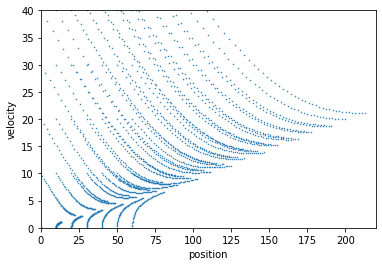

In [96]:
dt = 0.1
A = np.array([[0,1], [0.05, -0.5]])
phase_portrait(A, dt, start=0., stop=70., step=10., count=50, xlim=(0,220), ylim=(0, 40))

A
 [[1 2]
 [3 2]]
F
 [[1.05929876 0.10806933]
 [0.162104   1.11333342]]


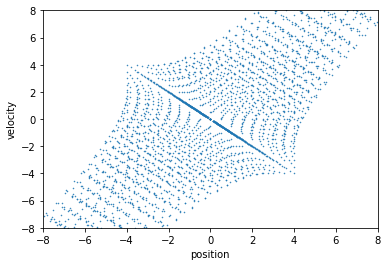

In [97]:
dt = 0.05
A = np.array([[1,2], [3, 2]])
phase_portrait(A, dt, start=-4., stop=4.5, step=0.5, count=30, xlim=(-8, 8), ylim=(-8, 8))
